In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn import metrics
from utils import *

In [118]:
data = pd.read_csv('./^SPX.csv')
data.index = pd.to_datetime(data['Date'], format='%Y-%m-%d') 
#data = pd.read_csv('./601988.SH.csv')

#data.index = pd.to_datetime(data['Date'], format='%Y%m%d') 
data = data.drop([ 'Date'], axis=1)
data = pd.DataFrame(data, dtype=np.float64)



In [164]:

data1 = pd.read_csv('./^SPX.csv')
data1.index = pd.to_datetime(data1['Date'], format='%Y-%m-%d') 
data = data1.iloc[21098:23878, :] 
data2 = data1.iloc[23878:23998, :] 

In [166]:
data2

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-01-23,2023-01-23,3978.139893,4039.310059,3971.639893,4019.810059,4019.810059,3945210000
2023-01-24,2023-01-24,4001.739990,4023.919922,3989.790039,4016.949951,4016.949951,3320430000
2023-01-25,2023-01-25,3982.709961,4019.550049,3949.060059,4016.219971,4016.219971,3724020000
2023-01-26,2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3809590000
2023-01-27,2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,4070.560059,3907760000
...,...,...,...,...,...,...,...
2023-07-10,2023-07-10,4394.229980,4412.600098,4389.919922,4409.529785,4409.529785,3429600000
2023-07-11,2023-07-11,4415.549805,4443.640137,4408.459961,4439.259766,4439.259766,3624220000
2023-07-12,2023-07-12,4467.689941,4488.339844,4463.229980,4472.160156,4472.160156,3920290000


In [119]:
training_set = data.loc['2012-01-04':'2023-01-22', :]  # 3501
test_set = data.loc['2023-01-22':, :]  # 180

#training_set['Close']=training_set['Close']/1000

#test_set['Close']=test_set['Close']/1000

In [167]:
test_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-23,3978.139893,4039.310059,3971.639893,4019.810059,4019.810059,3.945210e+09
2023-01-24,4001.739990,4023.919922,3989.790039,4016.949951,4016.949951,3.320430e+09
2023-01-25,3982.709961,4019.550049,3949.060059,4016.219971,4016.219971,3.724020e+09
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3.809590e+09
2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,4070.560059,3.907760e+09
...,...,...,...,...,...,...
2023-07-10,4394.229980,4412.600098,4389.919922,4409.529785,4409.529785,3.429600e+09
2023-07-11,4415.549805,4443.640137,4408.459961,4439.259766,4439.259766,3.624220e+09
2023-07-12,4467.689941,4488.339844,4463.229980,4472.160156,4472.160156,3.920290e+09


In [162]:
print(len(training_set))
print(len(test_set))

2780
120


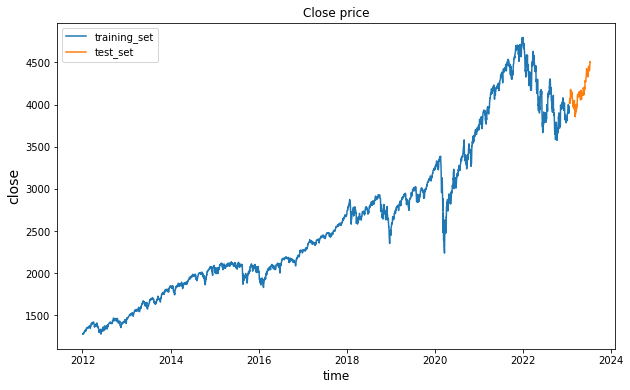

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(training_set['Close'], label='training_set')
plt.plot(test_set['Close'], label='test_set')
plt.title('Close price')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

c:\Users\him19\anaconda3\envs\7409\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


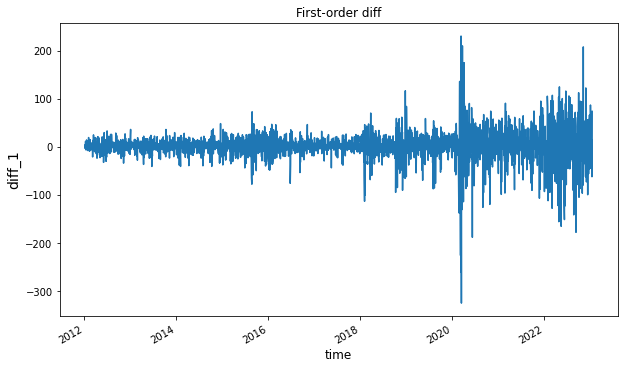

c:\Users\him19\anaconda3\envs\7409\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


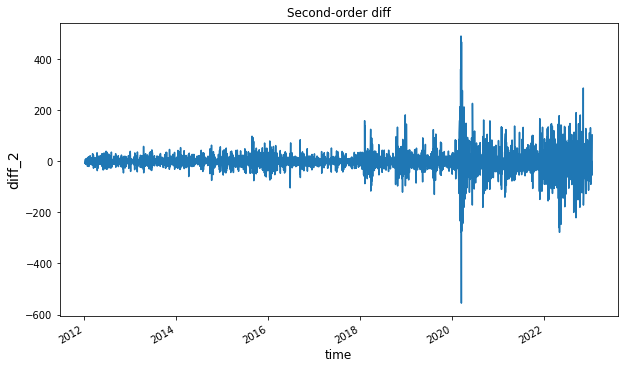

c:\Users\him19\anaconda3\envs\7409\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


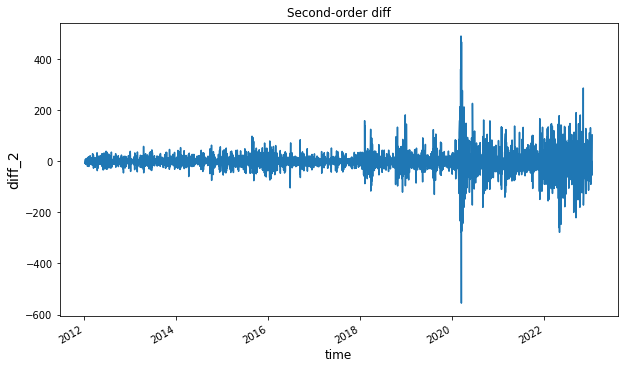

In [121]:
temp = np.array(training_set['Close'])

# First-order diff
training_set['diff_1'] = training_set['Close'].diff(1)
plt.figure(figsize=(10, 6))
training_set['diff_1'].plot()
plt.title('First-order diff')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_1', fontsize=14, horizontalalignment='center')
plt.show()

# Second-order diff
training_set['diff_2'] = training_set['diff_1'].diff(1)
plt.figure(figsize=(10, 6))
training_set['diff_2'].plot()
plt.title('Second-order diff')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_2', fontsize=14, horizontalalignment='center')
plt.show()


# Second-order diff
training_set['diff_2'] = training_set['diff_1'].diff(1)
plt.figure(figsize=(10, 6))
training_set['diff_2'].plot()
plt.title('Second-order diff')
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_2', fontsize=14, horizontalalignment='center')
plt.show()




(array([32.50768223, 42.70881087]), array([1.18722300e-08, 5.31985207e-10]), array([32.47261461, 42.65907064]), array([1.20884024e-08, 5.45381634e-10]))


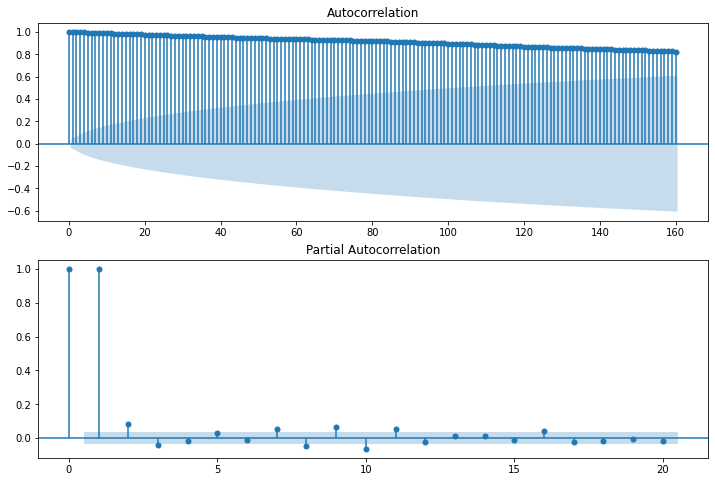

In [122]:

temp1 = np.diff(training_set['Close'], n=1)
# white noise test
training_data1 = training_set['Close'].diff(1)
# training_data1_nona = training_data1.dropna()
temp2 = np.diff(training_set['Close'], n=1)
# print(acorr_ljungbox(training_data1_nona, lags=2, boxpierce=True, return_df=True))
print(acorr_ljungbox(temp2, lags=2, boxpierce=True))
# p-value=1.53291527e-08, non-white noise time-seriess

acf_pacf_plot(training_set['Close'],acf_lags=160)

&                 close
trade_date           
2012-01-05   3.760010
2012-01-06  -3.250000
2012-01-09   2.889892
2012-01-10  11.380005
2012-01-11   0.400024
...               ...
2023-01-13  15.920166
2023-01-17  -8.120117
2023-01-18 -62.109864
2023-01-19 -30.010009
2023-01-20  73.760009

[2779 rows x 1 columns]


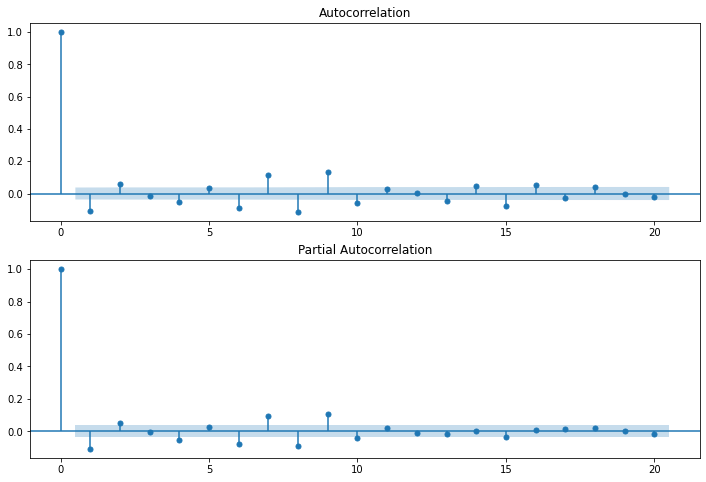

In [123]:
price = list(temp2)
data2 = {
    'trade_date': training_set['diff_2'].index[1:], 
    'close': price
}

df = pd.DataFrame(data2)
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')

training_data_diff = df.set_index(['trade_date'], drop=True)
print('&', training_data_diff)

acf_pacf_plot(training_data_diff)


In [132]:
history

[1277.300049,
 1281.060059,
 1277.810059,
 1280.699951,
 1292.079956,
 1292.47998,
 1295.5,
 1289.089966,
 1293.670044,
 1308.040039,
 1314.5,
 1315.380005,
 1316.0,
 1314.650024,
 1326.060059,
 1318.430054,
 1316.329956,
 1313.01001,
 1312.410034,
 1324.089966,
 1325.540039,
 1344.900024,
 1344.329956,
 1347.050049,
 1349.959961,
 1351.949951,
 1342.640015,
 1351.77002,
 1350.5,
 1343.22998,
 1358.040039,
 1361.22998,
 1362.209961,
 1357.660034,
 1363.459961,
 1365.73999,
 1367.589966,
 1372.180054,
 1365.680054,
 1374.089966,
 1369.630005,
 1364.329956,
 1343.359985,
 1352.630005,
 1365.910034,
 1370.869995,
 1371.089966,
 1395.949951,
 1394.280029,
 1402.599976,
 1404.170044,
 1409.75,
 1405.52002,
 1402.890015,
 1392.780029,
 1397.109985,
 1416.51001,
 1412.52002,
 1405.540039,
 1403.280029,
 1408.469971,
 1419.040039,
 1413.380005,
 1398.959961,
 1398.079956,
 1382.199951,
 1358.589966,
 1368.709961,
 1387.569946,
 1370.26001,
 1369.569946,
 1390.780029,
 1385.140015,
 1376.920044

In [142]:
history = [x for x in training_set['Close']]
history[-1]


3972.610107

In [139]:
model1 = sm.tsa.ARIMA(history, order=(2, 0, 0))
model_fit = model1.fit()
yhat = model_fit.forecast()


In [153]:

history = [x for x in training_set['Close']]
# print('history', type(history), history)
predictions = list()
model1 = sm.tsa.ARIMA(history, order=(2, 0, 0))
model_fit = model1.fit()
yhat = model_fit.forecast()
yhat = np.float(yhat[0])
predictions.append(yhat)
obs = test_set.iloc[0, 3]

In [154]:
obs

4019.8100590000004

In [144]:
print(yhat[0])
history.append(yhat[0])
model1 = sm.tsa.ARIMA(history, order=(2, 0, 0))
model_fit = model1.fit()
yhat = model_fit.forecast()
print(yhat[0])

[3964.24349229]
[3964.6880338]


c:\Users\him19\anaconda3\envs\7409\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [159]:
# order=(p,d,q)
model = sm.tsa.ARIMA(endog=training_set['Close'], order=(2, 0, 0)).fit()
#print(model.summary())

history = [x for x in training_set['Close']]
# print('history', type(history), history)
predictions = list()
# print('test_set.shape', test_set.shape[0])
for t in range(test_set.shape[0]):
    model1 = sm.tsa.ARIMA(history, order=(2, 1, 0))
    model_fit = model1.fit()
    yhat = model_fit.forecast()
    yhat = np.float(yhat[0])
    predictions.append(yhat)
    obs = test_set.iloc[t, 3]
    # obs = np.float(obs)
    # print('obs', type(obs))
    history.append(obs)
    # print(test_set.index[t])
    # print(t+1, 'predicted=%f, expected=%f' % (yhat, obs))
#print('predictions', predictions)

predictions1 = {
    'trade_date': test_set.index[:],
    'close': predictions
}
predictions1 = pd.DataFrame(predictions1)
predictions1 = predictions1.set_index(['trade_date'], drop=True)
predictions1.to_csv('./ARIMA2(svx).csv')


c:\Users\him19\anaconda3\envs\7409\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [131]:
len(history)

2900

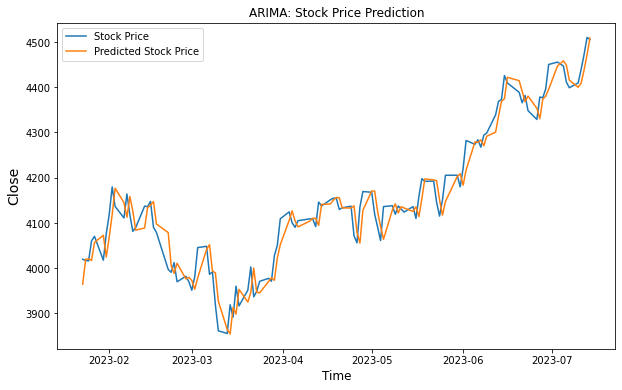

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(test_set['Close'], label='Stock Price')
plt.plot(predictions1, label='Predicted Stock Price')
plt.title('ARIMA: Stock Price Prediction')
plt.xlabel('Time', fontsize=12, verticalalignment='top')
plt.ylabel('Close', fontsize=14, horizontalalignment='center')
plt.legend()
plt.show()

c:\Users\him19\anaconda3\envs\7409\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\Users\him19\anaconda3\envs\7409\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


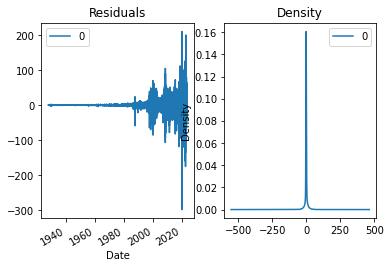

MSE: 1297.40697
RMSE: 36.01954
MAE: 28.77434
R2: 0.94579
                                value
Test Statistic Value        -0.698458
p-value                      0.847148
Lags Used                          27
Number of Observations Used      2752
Critical Value(1%)           -3.43273
Critical Value(5%)           -2.86259
Critical Value(10%)          -2.56733
                                   value
Test Statistic Value            -11.1016
p-value                      3.85354e-20
Lags Used                             26
Number of Observations Used         2752
Critical Value(1%)              -3.43273
Critical Value(5%)              -2.86259
Critical Value(10%)             -2.56733
# Series([], dtype: float64)


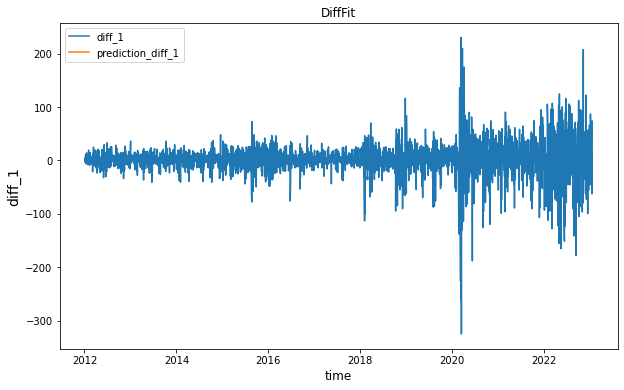

In [161]:


model2 = sm.tsa.ARIMA(endog=data['Close'], order=(2, 1, 0)).fit()
residuals = pd.DataFrame(model2.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()
residuals.to_csv('./ARIMA_residuals(svx).csv')
evaluation_metric(test_set['Close'],predictions)
adf_test(temp)
adf_test(temp1)

predictions_ARIMA_diff = pd.Series(model.fittedvalues, copy=True)
predictions_ARIMA_diff = predictions_ARIMA_diff[3479:]
print('#', predictions_ARIMA_diff)
plt.figure(figsize=(10, 6))
plt.plot(training_data_diff, label="diff_1")
plt.plot(predictions_ARIMA_diff, label="prediction_diff_1")
plt.xlabel('time', fontsize=12, verticalalignment='top')
plt.ylabel('diff_1', fontsize=14, horizontalalignment='center')
plt.title('DiffFit')
plt.legend()
plt.show()